In [15]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

In [16]:
DiamondsPrices2022=pd.read_csv(r"/content/Diamonds Prices2022.csv", header=0)
# copy yo back_up file
DiamondsPrices2022_bk=DiamondsPrices2022.copy()
#Display the first five records
DiamondsPrices2022.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
#dipslay dataset information
DiamondsPrices2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [18]:
#use label Encoder for target variable
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
DiamondsPrices2022['cut']=LE.fit_transform(DiamondsPrices2022['cut'])
DiamondsPrices2022['color']=LE.fit_transform(DiamondsPrices2022['color'])
DiamondsPrices2022['clarity']=LE.fit_transform(DiamondsPrices2022['clarity'])


In [19]:
#dipslay dataset information
DiamondsPrices2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  int64  
 3   color       53943 non-null  int64  
 4   clarity     53943 non-null  int64  
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 4.5 MB


In [20]:
DiamondsPrices2022.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

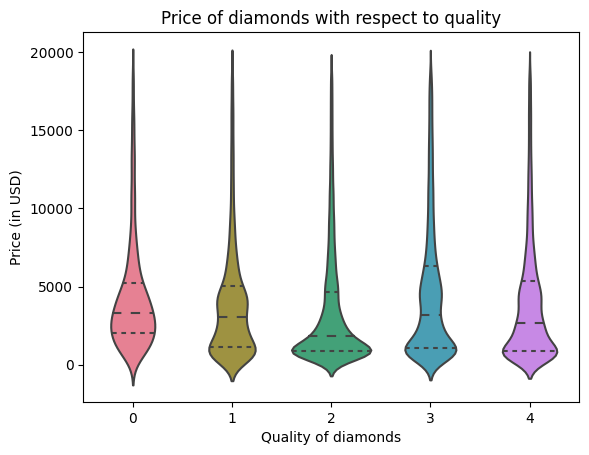

In [21]:
sns.violinplot(x='cut',y='price',data=DiamondsPrices2022, palette='husl',  inner = "quartile")
plt.xlabel('Quality of diamonds')
plt.ylabel('Price (in USD)')
plt.title('Price of diamonds with respect to quality')
plt.show()


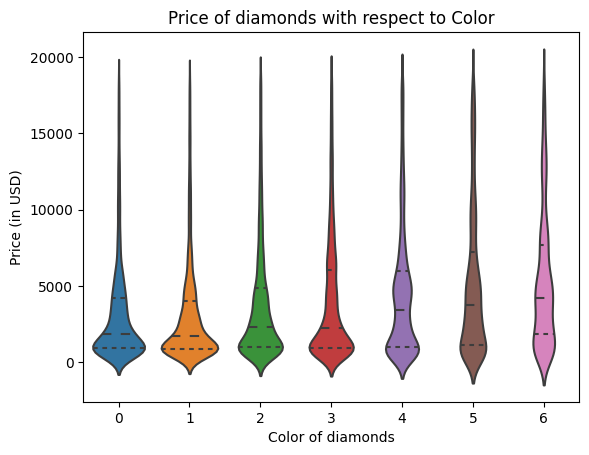

In [22]:
sns.violinplot(x='color', y='price', data=DiamondsPrices2022, inner= 'quartile' )
plt.xlabel('Color of diamonds')
plt.ylabel('Price (in USD)')
plt.title('Price of diamonds with respect to Color')
plt.show()

In [23]:
#Identify the independent and Traget Variables
IndepVar=[]
for col in DiamondsPrices2022.columns:
    if col != 'price':
        IndepVar.append(col)

TargetVar='price'

x=DiamondsPrices2022[IndepVar]
y=DiamondsPrices2022[TargetVar]

In [24]:
#split the data into train and test(random sampling)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=0)

#display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((37760, 10), (16183, 10), (37760,), (16183,))

In [25]:
#scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0,1))

x_train = mmscaler.fit_transform(x_train)
#x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train=pd.DataFrame(x_train)

x_test= mmscaler.fit_transform(x_test)
#x_test[cols]= mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)


# Comparing algorithms

In [26]:
#Load the dataset
RGRResults=pd.read_csv(r"/content/RGRResults.csv", header=0)

#Display the first five records
RGRResults.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [28]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR

# Create objects of Regression / Regressor models with default hyper-parameters

ModelMLR = LinearRegression()
ModelDCR = DecisionTreeRegressor()
ModelRFR = RandomForestRegressor()
ModelETR = ExtraTreesRegressor()
ModelKNN = KNeighborsRegressor(n_neighbors=5)
ModelBRR = BayesianRidge()
ModelSVR = SVR()

# Evalution matrix for all the algorithms

MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR, ModelKNN, ModelBRR, ModelSVR]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    RGRResults = RGRResults.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------------





Model Name:  LinearRegression()
Mean Absolute Error (MAE): 2664.47
Mean Squared Error (MSE): 10034480.311
Root Mean Squared Error (RMSE): 3167.725
R2_score: 0.371482
Root Mean Squared Log Error (RMSLE): 8.061
Mean Absolute Percentage Error (MAPE): 115.53 %
Adj R Square:  0.371365
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 448.399
Mean Squared Error (MSE): 2250694.014
Root Mean Squared Error (RMSE): 1500.231
R2_score: 0.859026
Root Mean Squared Log Error (RMSLE): 7.313
Mean Absolute Percentage Error (MAPE): 70.58 %
Adj R Square:  0.859
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 456.374
Mean Squared Error (MSE): 1760851.707
Root Mean Squared Error (RMSE): 1326.971
R2_score: 0.889708
Root Mean Squared Log Error (RMSLE): 7.191
Mean Ab

In [29]:
#REsults with comparing the all algorithms
#RGRResults.to_csv("C:\Users\Dlc\solutions\1205\RGRResults99.csv")
RGRResults.head(10)

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),2664.470130,0.371365,3167.724785,115.529529,1.003448e+07,8.060769,0.371482
1,DecisionTreeRegressor(),450.112093,0.858004,1505.519230,70.788529,2.266588e+06,7.316893,0.858030
2,LinearRegression(),2664.470130,0.371365,3167.724785,115.529529,1.003448e+07,8.060769,0.371482
3,DecisionTreeRegressor(),448.399432,0.859000,1500.231320,70.579766,2.250694e+06,7.313375,0.859026
4,"(DecisionTreeRegressor(max_features=1.0, rando...",456.374237,0.889688,1326.970876,74.440499,1.760852e+06,7.190654,0.889708
5,"(ExtraTreeRegressor(random_state=885676393), E...",1319.694797,0.796569,1802.004976,141.197790,3.247222e+06,7.496655,0.796607
6,KNeighborsRegressor(),1258.611012,0.757069,1969.199361,57.351444,3.877746e+06,7.585382,0.757114
7,BayesianRidge(),2651.386979,0.376400,3155.012140,114.816706,9.954102e+06,8.056748,0.376516
8,SVR(),2386.020065,0.118409,3751.301734,110.201075,1.407226e+07,8.229858,0.118572


In [30]:
#predict the values with ET algorithm
y_predF=ModelDCR.predict(x_test)

In [31]:
#Display the Final results
Results=pd.DataFrame({'price_A':y_test,'price_F':y_predF})
#merge two DataFrames on index of both the DataFrames
ResultsFinal=DiamondsPrices2022_bk.merge(Results,left_index=True,right_index=True)
#Display 5 records randomly
ResultsFinal.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price_A,price_F
41241,41242,0.46,Premium,E,VS2,60.2,60.0,1208,5.01,4.96,3.00,1208,468.0
45747,45748,0.58,Fair,G,VS1,64.7,60.0,1701,5.23,5.28,3.41,1701,1705.0
50585,50586,0.56,Ideal,F,VVS2,62.3,54.0,2281,5.29,5.34,3.31,2281,2282.0
20384,20385,0.31,Premium,F,VS2,62.3,60.0,625,4.32,4.35,2.70,625,8239.0
10197,10198,0.91,Very Good,F,VS1,63.5,56.0,4739,6.18,6.14,3.91,4739,4740.0
